# 모델 평가와 성능 향상

---

#### 우리는 더 좋은 모델을 만들기 위해서 모델 평가나 매개변수 선택에 대해 고민해봐야 함



- train_test_split : 데이터셋을 훈련 세트와 테스트 셋으로 나뉨
- score : 모델을 평가하기 위해 테스트 세트에 적용하여 정확히 분류된 샘플 비율을 계산

## 5.1 교차 검증

#### cross-validation은 일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한번 나누는것보다 훨씬 더 안정적임

- 데이터 셋을 여러번 반복해서 나누고 여러 모델을 학습
- 보통 k-겹 교차검증(k-fold CV)을 사용함.(fold: 비슷한 크기의 부분 집합을 의미)
  - 부분 집합 k개로 나눈 뒤에
  - 일련의 모델들을 만듬. 가령 5개라고 하면 첫 번째 폴드를 테스트 셋으로 하용하고 나머지(2-5)를 훈련 세트로 사용하여 폴드 1을 사용해 정확도를 평가
  - 이후에는 두 번쨰 폴드를 테스트 셋으로 허용하고 1,3,4,5를 사용
  - 등등등... 다섯개의 정확도 값을 얻을 수 있음

In [3]:
import mglearn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

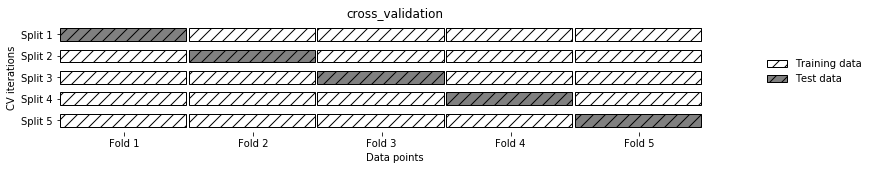

In [4]:
mglearn.plots.plot_cross_validation()

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("3겹 교차 검증 점수: {}".format(scores))

scores_cv = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("5겹 교차 검증 점수: {}".format(scores_cv))
print("5겹 교차 검증 점수: {:.2f}".format(scores_cv.mean()))

3겹 교차 검증 점수: [ 0.96078431  0.92156863  0.95833333]
5겹 교차 검증 점수: [ 1.          0.96666667  0.93333333  0.9         1.        ]
5겹 교차 검증 점수: 0.96


### 5.1.2 교차 검증의 장점

1. train_test_split은 데이터를 무작위로 나누기 때문에 좋은 샘플만 나눠질 수도 있어 정확도가 제대로 나오지 않을 수도 있음. 그에 반해 교차검증은 테스트 세트에 정확도가 한번씩 나오기 때문에 일반화가 가능-모델을 나누면 모델이 훈련 데이터에 민감한지 알 수 있음
2. 분할을 한 번 했을 때 보다 데이터를 더 효과적으로 사용할 수 있음.

단점은 연산 비용이 좀더 늘어남. k배 더 느림

### 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

In [18]:
from sklearn.datasets import load_iris
iris= load_iris()
print("Iris label:\n{}".format(iris.target))

Iris label:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


그냥 검증하면 문제가 생기기 때문에 **계층별 k-겹 교차검증***stratified k-fold cross validation*을 사용함

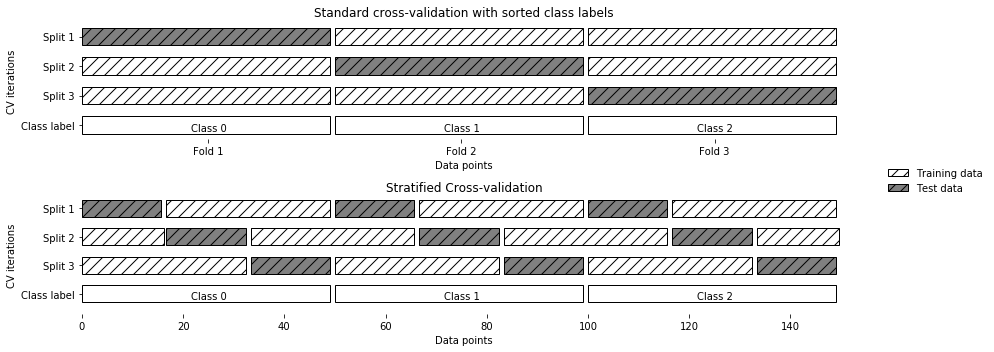

In [19]:
mglearn.plots.plot_stratified_cross_validation()

#### 교차 검증 상세 옵션

In [23]:
### 교차 검증 분할기를 만들어 놨음. :)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("교차 검증 점수:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [25]:
kfold = KFold(n_splits=3)

print("교차 검증 점수:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 0.  0.  0.]


In [26]:
kfold = KFold(n_splits=3, shuffle = True, random_state=0)

print("교차 검증 점수:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 0.9   0.96  0.96]


#### LOOCV (Leave-one-out cross validation)

폴드 하나에 샘플 하나만 들어있는 k겹 교차검증으로 생각할 수 있음.

각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용한다. 작은 데이터셋에서 효과가 좀 좋다.